In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#masukan data CSV movie
movie = pd.read_csv(r"C:\Users\Kodeic\Documents\Python\the-movies-dataset\movies_metadata.csv")
movie.dtypes

c:\users\kodeic\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [3]:
#convert id to float64 agar sama dengan tipe data CSV Link
movie['id'] = pd.to_numeric(movie['id'], errors='coerce')
movie.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                       float64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [4]:
#ganti nama id ke tmdbID agar sesuai dengan nama kolom di Data CSV Link
movie_rename = movie.rename(index=float, columns={"id": "tmdbId"})
movie_rename.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'tmdbId', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
#untuk mensortir hanya kolom title dan tmdbId saja yang diambil
movie_loc = movie_rename.loc[:,["title","tmdbId"]]
movie_loc.head(5)

,title,tmdbId
0.0,Toy Story,862.0
1.0,Jumanji,8844.0
2.0,Grumpier Old Men,15602.0
3.0,Waiting to Exhale,31357.0
4.0,Father of the Bride Part II,11862.0


In [6]:
#masukan data CSV Link
link = pd.read_csv(r"C:\Users\Kodeic\Documents\Python\the-movies-dataset\links.csv")
link.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [7]:
#untuk mensortir hanya kolom movieID dan tmdbId saja yang diambil
link_loc = link.loc[:,["movieId","tmdbId"]]
link_loc.head(5)

,movieId,tmdbId
0,1,862.0
1,2,8844.0
2,3,15602.0
3,4,31357.0
4,5,11862.0


In [8]:
#gabungkan Data movie_loc dan Data link_loc
data1 = pd.merge(movie_loc,link_loc)
data1.head(5)

,title,tmdbId,movieId
0,Toy Story,862.0,1
1,Jumanji,8844.0,2
2,Grumpier Old Men,15602.0,3
3,Waiting to Exhale,31357.0,4
4,Father of the Bride Part II,11862.0,5


In [9]:
#masukan data CSV rating
rating = pd.read_csv(r"C:\Users\Kodeic\Documents\Python\the-movies-dataset\ratings.csv")
rating.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [10]:
#gabungkan Data1 (yang telah di merge sebelumnya) dengan Data Rating
data2 = pd.merge(data1,rating)
pd.DataFrame(data2.head(5))

,title,tmdbId,movieId,userId,rating,timestamp
0,Toy Story,862.0,1,8,4.0,1013443596
1,Toy Story,862.0,1,9,4.5,1073837180
2,Toy Story,862.0,1,12,4.0,943912205
3,Toy Story,862.0,1,20,4.0,1368361348
4,Toy Story,862.0,1,24,4.0,979869938


In [11]:
#lihat berapa data yang terbentuk dari penggabungan table tsb
data2.shape

(26031604, 6)

In [12]:
#lalu ambil lah 1juta data karena kalo terlalu banyak tidak bisa
data3 = data2.iloc[:1000000,:]
data3.shape

(1000000, 6)

In [13]:
#Bikin pivot table dengan masukan Data dari Data3 , tetapkan rating sebagai nilai values, titel sebagai kolom, dan user ID sebagai indeks
pivot_table = data3.pivot_table(values='rating', index=['userId'],columns=['title'], aggfunc=np.sum, fill_value=0)
pivot_table.head(100)

title,A Midwinter's Tale,Ace Ventura: When Nature Calls,Across the Sea of Time,Angels and Insects,Antonia's Line,Assassins,Babe,Balto,Beautiful Girls,Bed of Roses,...,Toy Story,Twelve Monkeys,Two Bits,Two If by Sea,Unforgettable,Vampire in Brooklyn,Waiting to Exhale,When Night Is Falling,White Squall,Wings of Courage
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,...,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Masukan Title Film pada pivot table untuk menkompare dari Nilai yg lainnya
movie_watched = pivot_table["Pocahontas"] #masukan Title Film yg ingin dicari
similarity_with_other_movies = pivot_table.corrwith(movie_watched)
#Mencari kolerasi antara Title Film yang telah dimasukan dengan Title Film Lain
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
result = similarity_with_other_movies.head()
print (result.head())#untuk melihat / mencetak rekomendasi dengan Title Film Lain  
                     #semakin mendekati nilai angka 1 pada Title Film yang di input maka film tersebut semakin di rekomendasikan sesuai berurutan

title
Pocahontas                    1.000000
Jumanji                       0.269360
Babe                          0.205698
The Indian in the Cupboard    0.199556
Clueless                      0.176812
dtype: float64


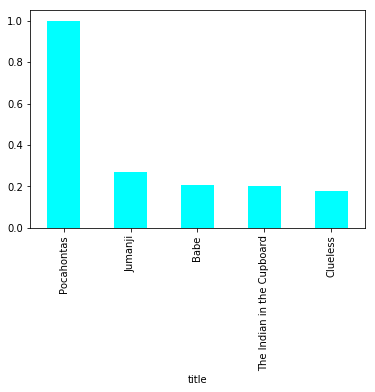

In [15]:
#Untuk melihat hasil Grafik Film yang direkomendasikan sesuai urutan dengan Title FIlm yang telah di input.
result.plot(kind='bar',colormap='cool')